#SUPERVISED LEARNING - CLASSIFICATION : DATASET KENDARAAN
oleh:	MUHAMMAD SHULHANNUR mshulhannur@gmail.com

Algoritma = k-Nearest Neighbor    
Banyak tetangga (k) = 13 {1,3,5,...,25}   
banyak data train = 5000   
banyak data test = 1000   
Penghitungan jarak = Euclidean Distance   
Kolom yg dipakaI = Jenis_Kelamin, Umur, Kendaraan_Rusak, Sudah_Asuransi, Premi, Lama_Berlangganan

#LAKUKAN IMPORT LIBRARIES

In [ ]:
#untuk data analysis and manipulation
import pandas as pd

#untuk matematika
import numpy as np

#untuk matematika
import math

#untuk grafik 2D
import matplotlib.pyplot as plt

#untuk url
import io

#untuk request file from url
import requests

#untuk request file from url
import time

#DATA PREPROCESSING

##READ FILES INTO DATASETS

In [ ]:
# Read kendaraan_train.csv file into DataFrame
url_datatraining = "https://cdn.discordapp.com/attachments/756550576640360469/833533583331164190/kendaraan_train.csv"
training = requests.get(url_datatraining).content
train = pd.read_csv(io.StringIO(training.decode('utf-8')), nrows=5000)
train = train.drop(columns = ['id','Kode_Daerah','Umur_Kendaraan','Kanal_Penjualan','SIM'])
train

,Jenis_Kelamin,Umur,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,Tidak,28029.0,97.0,0
1,Pria,48.0,0.0,Pernah,25800.0,158.0,0
2,NaN,21.0,1.0,Tidak,32733.0,119.0,0
3,Wanita,58.0,0.0,Tidak,2630.0,63.0,0
4,Pria,50.0,0.0,NaN,34857.0,194.0,0
...,...,...,...,...,...,...,...
4995,NaN,NaN,0.0,Pernah,2630.0,284.0,0
4996,Wanita,65.0,1.0,Pernah,44627.0,162.0,0
4997,Pria,29.0,0.0,Pernah,27973.0,210.0,1
4998,Pria,57.0,0.0,Pernah,NaN,21.0,0


In [ ]:
# Read kendaraan_test.csv file into DataFrame
url_datatesting="https://cdn.discordapp.com/attachments/756550576640360469/833533558941024266/kendaraan_test.csv"
testing=requests.get(url_datatesting).content
test = pd.read_csv(io.StringIO(testing.decode('utf-8')), nrows=1000)
test = test.drop(columns = ['Kode_Daerah','Umur_Kendaraan','Kanal_Penjualan','SIM'])
test

,Jenis_Kelamin,Umur,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,Wanita,49,0,Pernah,46963,145,0
1,Pria,22,1,Tidak,39624,241,0
2,Pria,24,1,Tidak,110479,62,0
3,Pria,46,1,Tidak,36266,34,0
4,Pria,35,0,Pernah,26963,229,0
...,...,...,...,...,...,...,...
995,Wanita,29,0,Pernah,2630,65,0
996,Pria,43,0,Pernah,35416,64,0
997,Wanita,49,0,Pernah,62108,38,0
998,Pria,45,0,Pernah,43707,247,0


##TENTUKAN NILAI K

In [ ]:
K_VALUES = [1,3,5,7,9,11,13,15,17,19,21,23,25]

In [ ]:
test.head()

,Jenis_Kelamin,Umur,Sudah_Asuransi,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,Wanita,49,0,Pernah,46963,145,0
1,Pria,22,1,Tidak,39624,241,0
2,Pria,24,1,Tidak,110479,62,0
3,Pria,46,1,Tidak,36266,34,0
4,Pria,35,0,Pernah,26963,229,0


##LAKUKAN DATA CLEANSING

In [ ]:
# method untuk cleansing data, untuk data non numerik yaitu Jenis_Kelamin dan Kendaraan_Rusak juga mengisi data yang kosong dengan nilai means kolom
def preprocess(dataset):
  gender = []
  broken = []
  for idx, node in dataset.iterrows():
    gender.append(1 if node['Jenis_Kelamin'] == 'Pria' else 0)
    broken.append(1 if node['Kendaraan_Rusak'] == 'Pernah' else 0)
  dataset["Jenis_Kelamin"] = gender
  dataset["Kendaraan_Rusak"] = broken
  # proses pengisian data yang kosong di kolom numerik
  for key in dataset.columns:
    # data kosong di isi dengan nilai mean dari kolom
    dataset[key].fillna(dataset[key].mean(), inplace=True)

##NORMALISASIKAN TABEL

In [ ]:
# menormalisasikan seluruh field
def normalizeAllNumericFields(dataset):
  numeric_field = dataset._get_numeric_data().columns
  for key in numeric_field:
      dataset[key] = (dataset[key] - dataset[key].min()) / (dataset[key].max() - dataset[key].min())

#OBSERVASI

##TENTUKAN NILAI EUCLEDIAN DISTANCE

In [ ]:
# menghitung jarak eucledian
def eucledian(train, test):
  keys = ['Jenis_Kelamin','Umur','Kendaraan_Rusak','Sudah_Asuransi','Premi','Lama_Berlangganan']
  total = 0
  for key in keys:
    total = total + math.pow(test[key] - train[key], 2)
  return math.sqrt(total)

##HITUNG NILAI KNN

In [ ]:
# menentukan hasil knn berdasarkan jarak eucledian terdekat
def define_outcome(dataset, k):
  datas = dataset[0:k]
  # menghitung banyak case dengan output 1
  totalPositive = [1 for case in datas.iterrows() if case[1]['Tertarik'] == 1]
  # menghitung banyak case dengan output 0
  totalNegative = [0 for case in datas.iterrows() if case[1]['Tertarik'] == 0]
  # jika lebih banyak case dengan output 1 maka hasil knn adalah 1 dan sebaliknya
  if len(totalPositive) > len(totalNegative):
      return 1
  else:
      return 0

##HITUNG NILAI AKURASI

In [ ]:
# menghitung akurasi
def calc_accurracy(miss_outcome, pass_outcome):
  total = miss_outcome + pass_outcome
  return float(pass_outcome) * 100 / total

#EKSEKUSI

##PEMANGGILAN FUNGSI

In [ ]:
# proses utama KNN
def k_nn(train, test, k):
  temp_outcome = []
  for test_case in test.iterrows():
    temp = []
    for train_case in train.iterrows():
      temp.append(eucledian(train_case[1], test_case[1]))
    train['eucledian'] = temp
    sorted_by_eucledian = train.sort_values('eucledian')
    temp_outcome.append(define_outcome(sorted_by_eucledian, k))
  test['outcome'] = temp_outcome
  return(test)

##READ DATASETS INTO FILES

In [ ]:
# export hasil ke csv
def exportCSV(hasil,k):
  df = hasil[['outcome','Tertarik','status']]
  nama = 'tetangga '+str(k)+' | k-NN.csv'
  df.to_csv(nama)
  print("\nexport file ",nama,'selesai')

##MAIN


export file  tetangga 1 | k-NN.csv selesai
akurasi  1 - NearestNeighbor : 81.1
Runtime : 410.52049589157104

export file  tetangga 3 | k-NN.csv selesai
akurasi  3 - NearestNeighbor : 85.2
Runtime : 409.7577600479126

export file  tetangga 5 | k-NN.csv selesai
akurasi  5 - NearestNeighbor : 85.3
Runtime : 409.55032658576965

export file  tetangga 7 | k-NN.csv selesai
akurasi  7 - NearestNeighbor : 86.0
Runtime : 408.7255518436432

export file  tetangga 9 | k-NN.csv selesai
akurasi  9 - NearestNeighbor : 86.7
Runtime : 408.51928997039795

export file  tetangga 11 | k-NN.csv selesai
akurasi  11 - NearestNeighbor : 86.9
Runtime : 408.7905373573303

export file  tetangga 13 | k-NN.csv selesai
akurasi  13 - NearestNeighbor : 86.5
Runtime : 409.499831199646

export file  tetangga 15 | k-NN.csv selesai
akurasi  15 - NearestNeighbor : 87.1
Runtime : 409.92792224884033

export file  tetangga 17 | k-NN.csv selesai
akurasi  17 - NearestNeighbor : 87.3
Runtime : 410.2680721282959

export file  tet

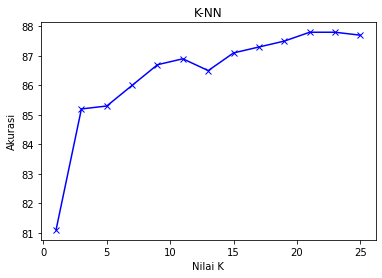

--- Running for 5330.6818215847015 seconds ---


In [ ]:
start_time = time.time()
preprocess(train)
preprocess(test)
normalizeAllNumericFields(train)
normalizeAllNumericFields(test)
# tinggal proses k-nn nya aja
res = []
start_knn = time.time()
for k in K_VALUES:
  start = time.time()
  output = k_nn(train,test,k)
  miss_outcome = 0
  pass_outcome = 0
  status = []
  for test_case in output.iterrows():
    if test_case[1]['outcome'] != test_case[1]['Tertarik']:
      miss_outcome = miss_outcome + 1
      status.append('SALAH')
    else:
      pass_outcome = pass_outcome + 1
      status.append('benar')
  acc = calc_accurracy(miss_outcome, pass_outcome)
  output['status'] = status
  exportCSV(output,k)
  res.append(acc)
  stop = time.time()
  print('akurasi ',k,'- NearestNeighbor :',acc)
  print('Runtime :',stop - start)
stop_knn = time.time()
print('Total Runtime : ',stop_knn - start_knn)
plt.plot(K_VALUES, res, 'bx-')
plt.ylabel('Akurasi')
plt.xlabel('Nilai K')
plt.title('K-NN')
plt.show()
print("--- Running for %s seconds ---" % (time.time() - start_time))